# Linear Regression

$$
y=xw + b,\quad L(f)=L(w, b)=\sum_{i=1}^{n}(y_i - (x_i w + b))^2\\
f^* =\arg\min_f L(f),\quad w^*, b^* = \arg\min_{w,b} L(w,b)=\arg\min_{w,b}\sum_{i=1}^{n}(y_i - (x_i w + b))^2\\
\frac{\partial L}{\partial w_j}=\sum_{i=1}^{n}2(y_i - (x_i w + b))(-x_{ij})=0\\ \frac{\partial L}{\partial b}=\sum_{i=1}^{n}2(y_i - (x_i w + b))(-1)=0\\
w_j^{t+1} \leftarrow w_j^t - \eta \frac{\partial L}{\partial w_j},\quad b^{t+1} \leftarrow b^t - \eta \frac{\partial L}{\partial b}\\
$$

### Vanilla Gradient Descent

$$
w^{t+1} \leftarrow w^t - \eta g_t,\quad g_t=\nabla L(w^t)\\
$$
### Adagrad

$$
\eta_t = \frac{\eta}{\sqrt{t+1}},\quad \sigma_t=\sqrt{\frac{1}{t+1}\sum_{i=0}^{t}g_i^2}\\
\frac{\eta^t}{\sigma_t} = \frac{\eta}{\sqrt{\sum_{i=0}^{t}g_i^2}}\\
w^{t+1} \leftarrow w^t - \frac{\eta}{\sqrt{\sum_{i=0}^{t}g_i^2}} g_t\\
$$

y = -188.43 + 2.67x


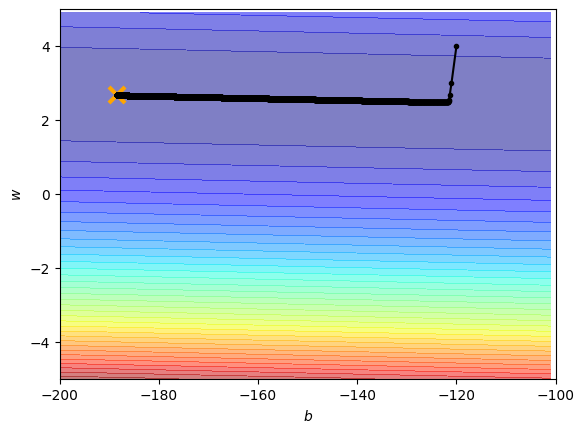

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

# y_data = b + w * x_data

b = -120
w = 4
lr = 1
epochs = 100000

b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

for i in range(epochs):

    b_grad = 0.0
    w_grad = 0.0

    for n in range(len(x_data)):
        b_grad += -2.0 * (y_data[n] - (b + w * x_data[n])) * 1.0
        w_grad += -2.0 * (y_data[n] - (b + w * x_data[n])) * x_data[n]
        
    lr_b += b_grad**2
    lr_w += w_grad**2

    b -= lr/np.sqrt(lr_b) * b_grad
    w -= lr/np.sqrt(lr_w) * w_grad
    
    b_history.append(b)
    w_history.append(w)
    
print(f"y = {b:.2f} + {w:.2f}x")

x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(y), len(x)))
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - (b + w * x_data[n])) ** 2
        Z[j][i] /= len(x_data)
plt.contourf(x, y, Z, levels=50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')   
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.show()

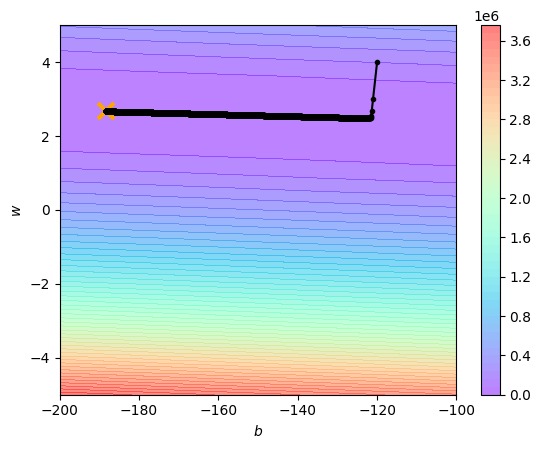

In [8]:
b_range = np.linspace(-200, -100, 30)
w_range = np.linspace(-5, 5, 30)
B, W = np.meshgrid(b_range, w_range)
Loss = np.zeros_like(B)
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        y_pred = B[i, j] + W[i, j] * np.array(x_data)
        Loss[i, j] = np.mean(y_data - y_pred) ** 2

plt.contourf(B, W, Loss, levels=50, alpha=0.5, cmap=plt.get_cmap('rainbow'))
plt.colorbar()
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')   
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.show()

y = -188.43 + 2.67x


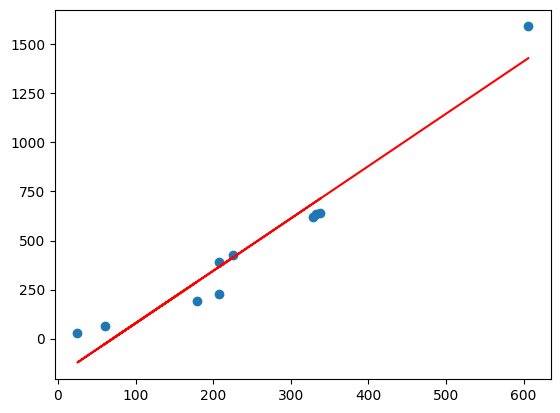

In [31]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(np.array(x_data).reshape(-1, 1), y_data)
print(f"y = {reg.intercept_:.2f} + {reg.coef_.item():.2f}x")
plt.scatter(x_data, y_data)
plt.plot(x_data, reg.predict(np.array(x_data).reshape(-1, 1)), color='red')
plt.show()